In [1]:
import numpy as np
import pandas as pd
#from pandas_datareader import DataReader
import pandas_datareader
from datetime import datetime
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm

import ipywidgets as widgets

%matplotlib inline

DatePicker(value=None, description='Pick a Start Date')

DatePicker(value=None, description='Pick a End Date')

Output()

         AAC      AAMC       AEY      ALRN      ANCN      APDN      APTO  \
0  -0.158712  0.066148 -0.005731 -0.036837  0.018634 -0.066691 -0.051293   
1   0.064539  0.029253  0.022728  0.013048 -0.078377 -0.071459  0.025975   
2   0.012423 -0.009050  0.016713 -0.057158  0.047125 -0.037740 -0.004283   
3   0.074901  0.022473 -0.039442  0.000000 -0.114218  0.074108  0.029601   
4   0.007986 -0.042676 -0.017392  0.023257 -0.032553  0.000000  0.072321   
5  -0.071838  0.001854  0.011628  0.137594 -0.056726  0.035091  0.056512   
6  -0.011050  0.049672  0.083150  0.018197  0.082136  0.098440 -0.022223   
7  -0.189757 -0.231993 -0.026956 -0.021542 -0.089948 -0.133531 -0.077860   
8  -0.079172  0.011050 -0.005479 -0.027166 -0.083808  0.035091 -0.037118   
9  -0.031176  0.001098  0.005479  0.015372  0.010604 -0.035091  0.024898   
10  0.080043  0.062753  0.000000  0.140499 -0.111474  0.000000 -0.033336   
11  0.000000 -0.022942  0.010870  0.058630  0.115264 -0.036368 -0.030110   
12 -0.036026

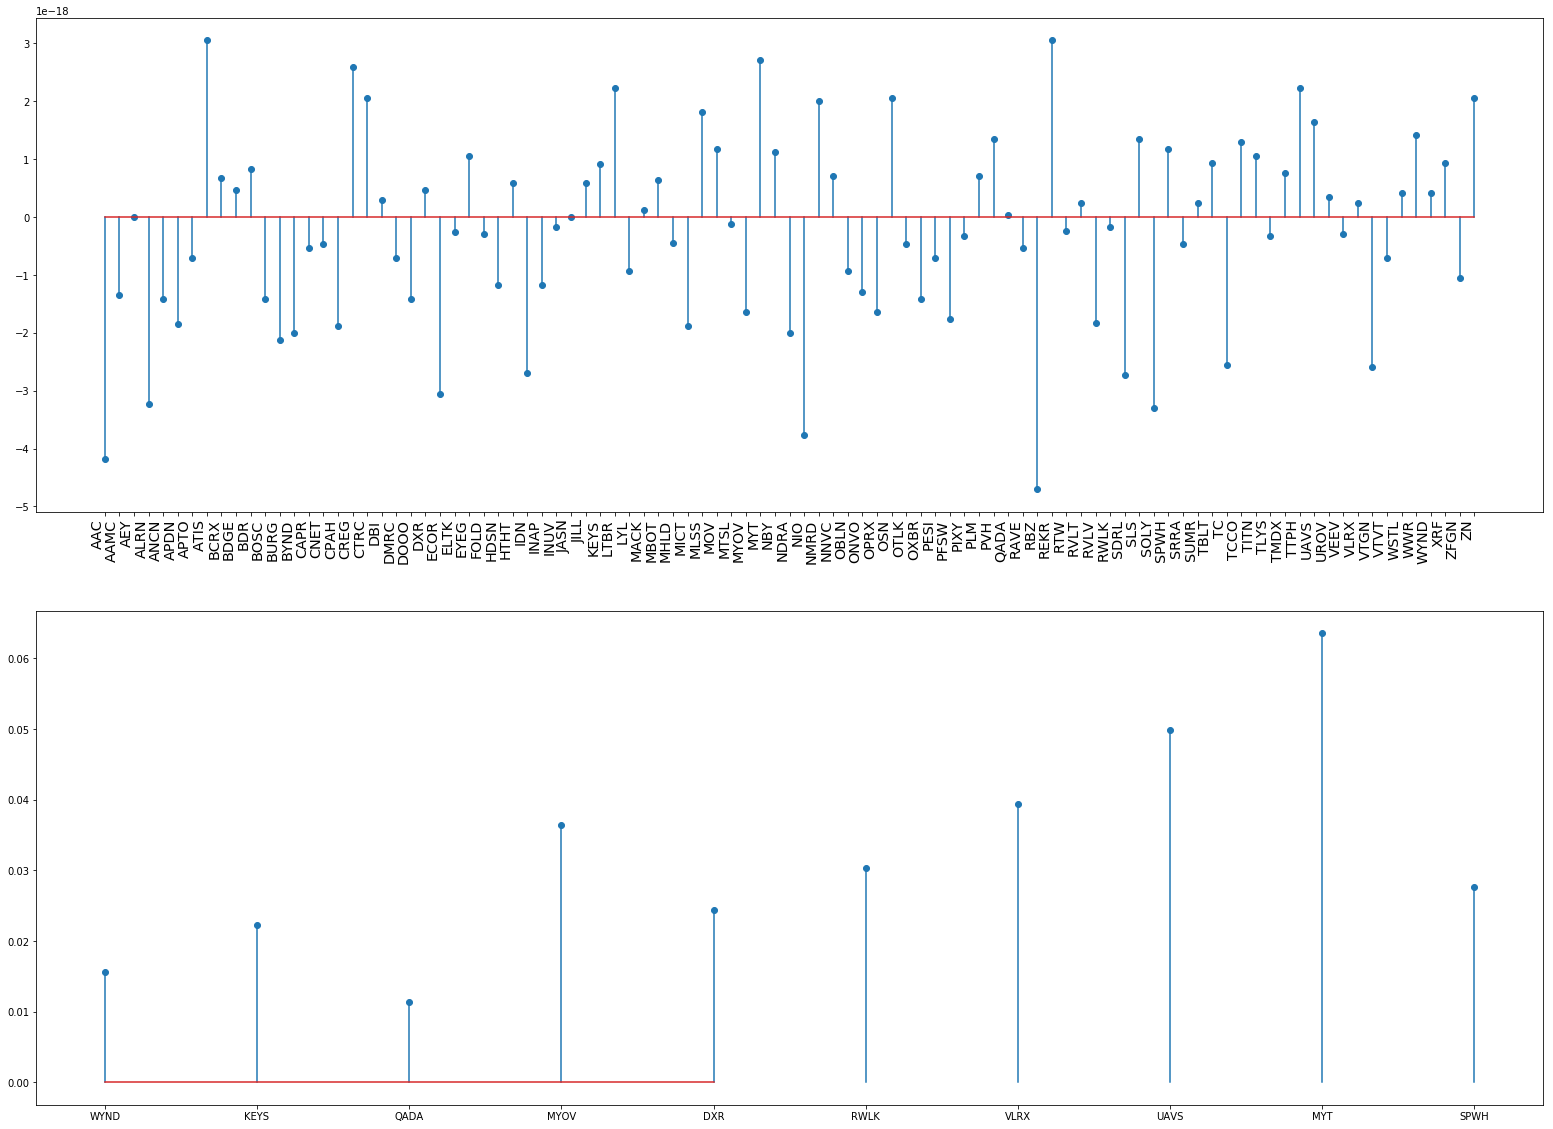

         AAC      AAMC       AEY      ALRN      ANCN      APDN      APTO  \
0   0.045462  0.043393  0.049393 -0.049832  0.000000  0.019803  0.011429   
1   0.134919  0.055862 -0.018238  0.010167 -0.050354  0.038466 -0.015268   
2   0.056619  0.000000 -0.012346 -0.002894  0.049461 -0.019048  0.077673   
3  -0.009217 -0.007905  0.048494  0.014389 -0.005376  0.000000  0.068756   
4   0.096992  0.090972  0.000000  0.000000  0.000000 -0.019418 -0.016751   
..       ...       ...       ...       ...       ...       ...       ...   
58 -0.042902 -0.032335 -0.014742  0.041627  0.047948 -0.036368 -0.012793   
59  0.020340  0.020447 -0.020001 -0.134145 -0.003752 -0.037740 -0.012959   
60 -0.062304 -0.034631  0.010050 -0.006154 -0.082238 -0.080043  0.038384   
61  0.039221  0.000000  0.000000  0.074901 -0.024795  0.040822 -0.012632   
62 -0.053609  0.004751 -0.010050 -0.052922 -0.038384 -0.040822 -0.038882   

        ATIS      BCRX      BDGE  ...      VEEV      VLRX      VTGN      VTVT  \
0   0.

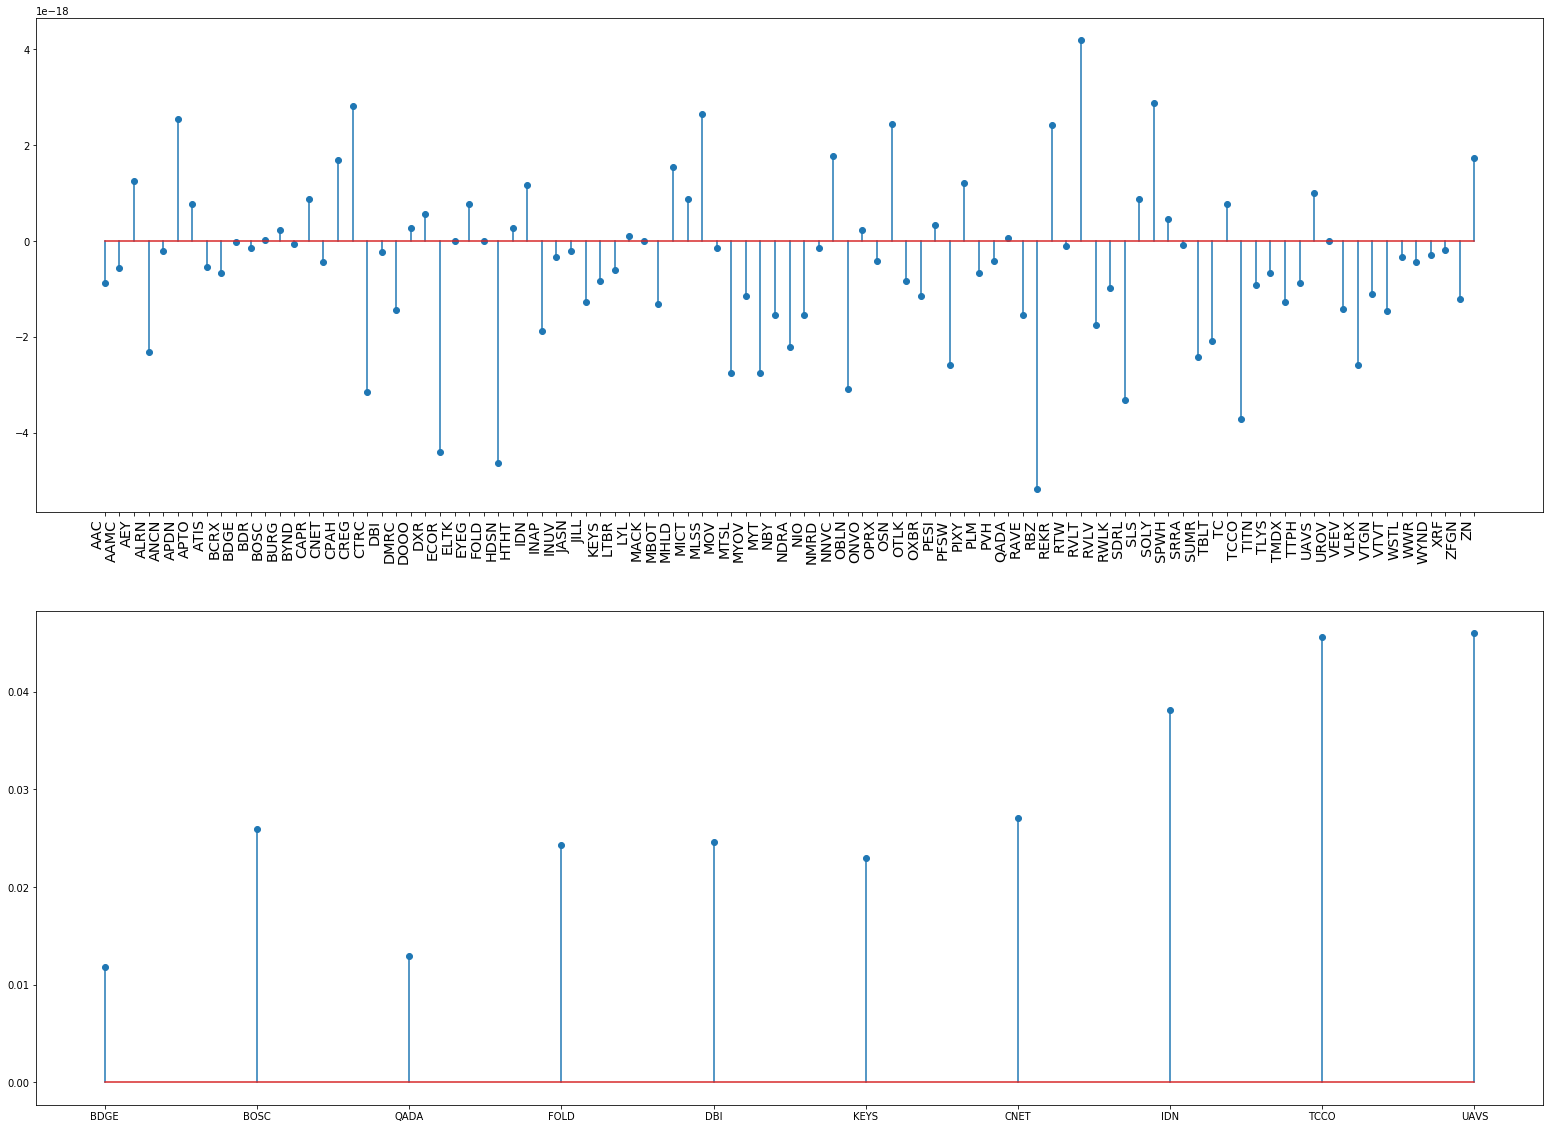

In [2]:
LIST = ['JILL','ELTK','ONVO','UAVS','AEY','OBLN','XRF','MLSS','MICT','SOLY','NMRD','ZFGN','INUV','VTGN','RBZ','BURG','MTSL','DXR','QADA','MYOV','BOSC','APTO','PESI','TITN','EYEG','CAPR','UROV','APDN','TTPH','ECOR','WYND','ZN','OSN','HDSN','BDR','TBLT','PLM','DMRC','MOV','PVH','TLYS','CPAH','VLRX','SDRL','RWLK','VEEV','OPRX','RAVE','PFSW','SPWH','TMDX','DOOO','TC','NBY','WSTL','KEYS','DBI','INAP','RVLT','JASN','CNET','RVLV','REKR','SUMR','MBOT','BDGE','FOLD','SRRA','IDN','PIXY','AAC','LYL','MHLD','NIO','SLS','NNVC','MYT','BYND','CREG','ATIS','TCCO','AAMC','OXBR','ANCN','BCRX','ALRN','RTW','LTBR','WWR','CTRC','VTVT','MACK','NDRA','OTLK','MYT','BYND','CREG','ATIS','TCCO','AAMC','OXBR','ANCN','BCRX','ALRN','RTW','LTBR','WWR','HTHT','CTRC','MACK']
List = sorted(list(set(LIST)))
#print(List)

output = widgets.Output()

cal_Start = widgets.DatePicker(
        description='Pick a Start Date',
        disabled=False
    )

cal_End = widgets.DatePicker(
        description='Pick a End Date',
        disabled=False
    )

def dates1(start_date1):
    
    global filtered
    output.clear_output()
    global sd1
    sd1 = start_date1
    
def dates2(end_date1):
    
    global filtered
    output.clear_output()
    
    returns_port = pd.DataFrame()
    for i in List:
        one_stock = pandas_datareader.DataReader(i,'yahoo',sd1,end_date1)
        returns_one_stock = pd.DataFrame(np.diff(np.log(one_stock['Adj Close'].values)))
        #dat1 = pd.concat([dat1, dat2], axis=1)
        returns_port = pd.concat([returns_port, returns_one_stock], axis=1)
    returns_port.columns = List
    print(returns_port)
    portfolios = np.mat(returns_port)

    FAMA_FRENCH = pd.read_csv('C:/Users/mohdn/Downloads/F-F_Research_Data_Factors_daily.csv')
    
    sy,sm,sd = sd1.year,'%02d' % sd1.month,'%02d' % sd1.day
    symd = str(sy)+str(sm)+str(sd)
    symd = int(symd)
    
    
    ey,em,ed = end_date1.year,'%02d' % end_date1.month,'%02d' % end_date1.day
    eymd = str(ey)+str(em)+str(ed)
    eymd = int(eymd)

    FAMA = FAMA_FRENCH[(FAMA_FRENCH['Date']>symd) & (FAMA_FRENCH['Date']<=eymd)]
    
    print(FAMA)
    
    MKT = pd.DataFrame(FAMA['Mkt-RF'] -  FAMA['RF'])
    SMB = pd.DataFrame(FAMA['SMB'])
    HML = pd.DataFrame(FAMA['HML'])
    
    MKT.reset_index(drop=True,inplace=True)
    SMB.reset_index(drop=True,inplace=True)
    HML.reset_index(drop=True,inplace=True)

    [T,N] = portfolios.shape

    m=np.ones((T,1))

    F = np.concatenate((m,MKT,SMB,HML),axis=1)

    factors = np.mat(F)

    K = F.shape[1]
    print(T)
    print(N)
    print(K)
    print(len(F))

    beta = np.mat(np.zeros((K,N)))
    
    for j in range(portfolios.shape[1]):
        x = factors
        y = portfolios[:,[j]]
        beta[:,[j]] = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T,x)),x.T),y) 
    #Step 2. RUN CROSS-SECTIONAL REGRESSION
    # ACTIVE RETURNS
    lamb = np.zeros((K,T))
    alpha = np.zeros((N,T))
    sigma = np.zeros((T,N,N))
    
    for i in range(portfolios.shape[0]):
        x = beta.T
        y = portfolios[[i],:].T
        lambdafun = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T,x)),x.T),y)
        lamb[:,[i]] = lambdafun
        alpha[:,[i]] = np.subtract(y,np.matmul(x,lambdafun))
        sigma[[i],:,:] = np.matmul(alpha[:,[i]],alpha[:,[i]].T)
    
    ALPHA = alpha.mean(axis =1)
    SIGMA = sigma.mean(axis =0)
    
    print(beta)
    print(ALPHA)
    print(SIGMA )
    
    R = ALPHA
    R = np.reshape(R,(N,1))
    I = np.ones((N,1))
    V = SIGMA
    V_inv = np.linalg.inv(V)
    
    a = float(np.matmul(np.matmul(R.T,V_inv),R))
    b = float(np.matmul(np.matmul(R.T,V_inv),I))
    c = float(np.matmul(np.matmul(I.T,V_inv),I))
    
    A = np.matrix([[a,b],[b,c]],dtype = 'float')
    A_inv = np.linalg.inv(A)
    
    r_star = (b/c)
    
    lamda_halfs = np.matmul(A_inv,([[r_star],[1]]))
    
    x = float(lamda_halfs[0])*np.matmul(V_inv,R) + float(lamda_halfs[1])*np.matmul(V_inv,I)
    print(sum(x))
    
    New_df = pd.DataFrame(ALPHA,columns=['Values'])
    New_df['Stock'] = List
    plt.rcParams["figure.figsize"] = (27,20)
    plt.subplot(2, 1, 1)
    active_return_plot = plt.stem(New_df['Stock'] , New_df['Values'])
    plt.xticks(
        rotation=90, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'
    )
    
    active_rate = pd.DataFrame( list(x),columns=['Weights'])
    active_rate['Stocks'] = List
    active_rate['Risk'] = np.sqrt(list(np.diag(SIGMA)))
    top10_active = active_rate.nlargest(10,'Weights')


    #plt.rcParams["figure.figsize"] = (15,15)
    #plt.stem(active_rate['Stocks'] , active_rate['Risk'])
    
    plt.rcParams["figure.figsize"] = (15,15)
    plt.subplot(2, 1, 2)
    
    top10_active_plot = plt.stem(top10_active['Stocks'] , top10_active['Risk'])
    
    
    with output:
        #print(returns_port.head())
        #print(ALPHA)
        #print(SIGMA)
        print(T)
        print(active_return_plot)
        print(top10_active_plot)
        
def dropdown_field_eventhandler(change):
    dates1(change.new)
    
def dropdown_field_eventhandler1(change1):
    dates2(change1.new)
    
cal_Start.observe(dropdown_field_eventhandler, names='value')
cal_End.observe(dropdown_field_eventhandler1, names='value')

display(cal_Start,cal_End)

display(output)    

In [ ]:
# Extra Code:

sda = widgets.DatePicker(
 description='Pick a Start Date',
        disabled=False
    )
eda = widgets.DatePicker(
 description='Pick a Start Date',
        disabled=False
    )
display(sda)
display(eda)

FAMA_FRENCH = pd.read_csv('C:/Users/mohdn/Downloads/F-F_Research_Data_Factors_daily.csv')
sy,sm,sd = sda.value.year,'%02d' % sda.value.month,'%02d' % sda.value.day
print(sy,sm,sd)
symd = str(sy)+str(sm)+str(sd)
symd = int(symd)
print(symd)

ey,em,ed = eda.value.year,'%02d' % eda.value.month,'%02d' % eda.value.day
print(ey,em,ed)
eymd = str(ey)+str(em)+str(ed)
eymd = int(eymd)
print(eymd)

#FAMA_FRENCH.set_index('Date',inplace = True)

#FF = FAMA_FRENCH.iloc[ymd]
FF = FAMA_FRENCH[(FAMA_FRENCH['Date']>symd) & (FAMA_FRENCH['Date']<=eymd)]
len(FF)

one_stock = pandas_datareader.DataReader('RWLK','yahoo',datetime(2019,5,3),datetime(2019,7,26))
one_stock